## Vương Thanh Linh
## MSSV: 21521082

In [25]:
from keras.datasets import mnist
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
(train_images, train_labels), (test_images,	test_labels) = mnist.load_data()

In [27]:
print("Train images: ", train_images.shape)
print("Train labels: ", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels: ", test_labels.shape)

Train images:  (60000, 28, 28)
Train labels:  (60000,)
Test images: (10000, 28, 28)
Test labels:  (10000,)


In [28]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [30]:
train_img, val_img, train_label, val_label = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
print("Train images: ", train_img.shape)
print("Validation images: ", val_img.shape)

Train images:  (48000, 28, 28)
Validation images:  (12000, 28, 28)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

nn_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history = nn_model.fit(train_img, train_label, epochs=5, batch_size=32, validation_data=(val_img, val_label))

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.3236 - accuracy: 0.9067 - val_loss: 0.1673 - val_accuracy: 0.9521
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1554 - accuracy: 0.9538 - val_loss: 0.1194 - val_accuracy: 0.9658
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1171 - accuracy: 0.9650 - val_loss: 0.0999 - val_accuracy: 0.9708
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0954 - accuracy: 0.9708 - val_loss: 0.0870 - val_accuracy: 0.9737
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0789 - accuracy: 0.9755 - val_loss: 0.0839 - val_accuracy: 0.9740


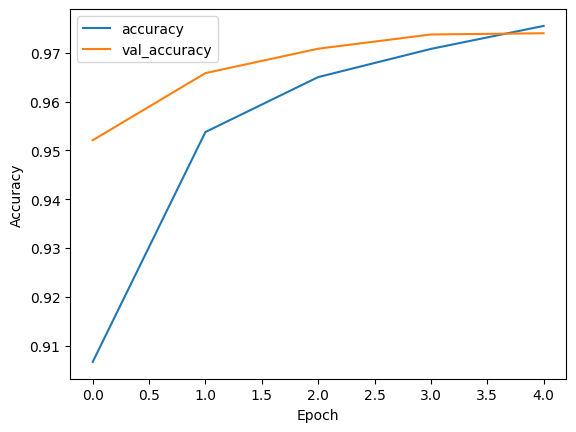

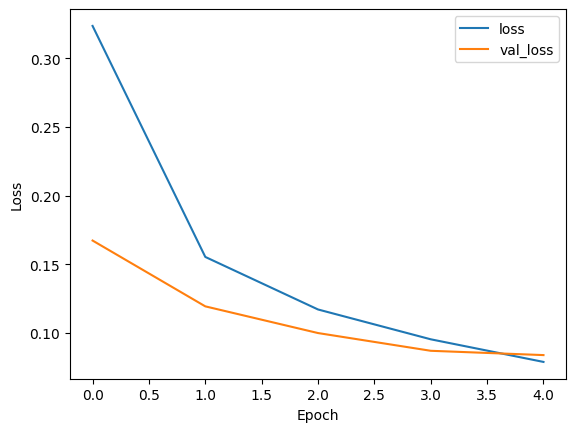

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Biểu đồ loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
predict = nn_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [36]:
test_loss, test_accuracy = nn_model.evaluate(test_images, test_labels)
print("Accuracy on test sample:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0754 - accuracy: 0.9770
Accuracy on test sample: 0.9769999980926514


In [37]:
from sklearn.metrics import classification_report
import numpy as np

predict_label = np.argmax(predict, axis=1)

nn_report = classification_report(test_labels,predict_label)
print(nn_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



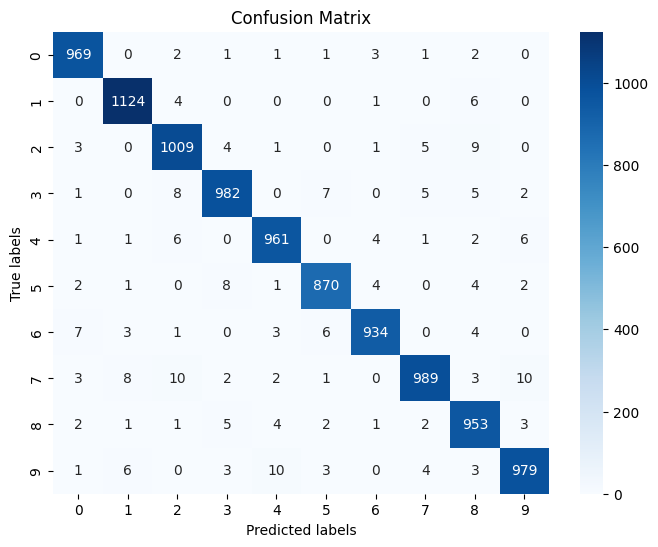

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_labels, predict_label)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 21ms/step


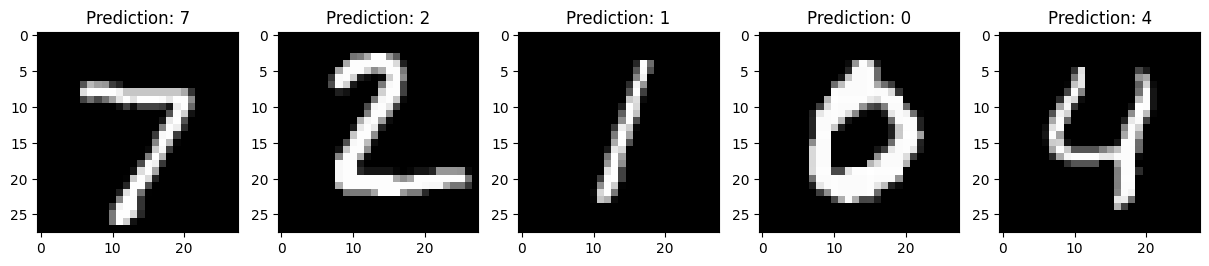

In [39]:
sample_test = test_images[:5]
test_pred = nn_model.predict(sample_test)
test_pred_label = np.argmax(test_pred, axis=1)
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_test[i], cmap='gray')
    plt.title(f'Prediction: {test_pred_label[i]}')
plt.show()

In [40]:
import pandas as pd

results_df = pd.DataFrame({'Predicted': predict_label, 'True': test_labels})

incorrect_indices = np.where(predict_label != test_labels)[0]

print("First 5 incorrect predictions:")
print(results_df.iloc[incorrect_indices[:5]])

First 5 incorrect predictions:
     Predicted  True
149          4     2
151          8     9
247          2     4
259          0     6
320          8     9
